# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Eva Massarelli
## Did Q1 and Q3.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [1]:
## Set up environment
import numpy as np # NumPy
import pandas as pd # Pandas
import seaborn as sns # Seaborn

## Package routine tasks
# Print function
def pn(x):
    print(x, '\n')

df = pd.read_csv('./data/cars_hw.csv', index_col=0) # load data, to set index used https://www.statology.org/pandas-use-first-column-as-index/
pn(df.head())
pn(df.describe()) # numerical values all have no missing values

         Make  Make_Year   Color  Body_Type  Mileage_Run No_of_Owners  \
1  Volkswagen       2017  silver      sedan        44611          1st   
2     Hyundai       2016     red  crossover        20305          1st   
3       Honda       2019   white        suv        29540          2nd   
4     Renault       2017  bronze  hatchback        35680          1st   
5     Hyundai       2017  orange  hatchback        25126          1st   

   Seating_Capacity Fuel_Type Transmission Transmission_Type   Price  
1                 5    diesel      7-Speed         Automatic  657000  
2                 5    petrol      5-Speed            Manual  682000  
3                 5    petrol      5-Speed            Manual  793000  
4                 5    petrol      5-Speed            Manual  414000  
5                 5    petrol      5-Speed            Manual  515000   

         Make_Year   Mileage_Run  Seating_Capacity         Price
count   976.000000    976.000000        976.000000  9.760000e+02
mea

In [2]:
var = 'Make'
pn(df[var].unique()) # no missing category

['Volkswagen' 'Hyundai' 'Honda' 'Renault' 'Tata' 'Chevrolet'
 'Maruti Suzuki' 'Toyota' 'Mahindra' 'Ford' 'Nissan' 'Jeep' 'MG Motors'
 'Kia' 'Skoda' 'Datsun'] 



[ 5  6  3 10  1  2  9  0  4  8 11  7] 

5     137
2     135
3     124
4     112
6      92
7      85
8      73
1      69
9      53
11     44
10     38
0      14
Name: Age, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



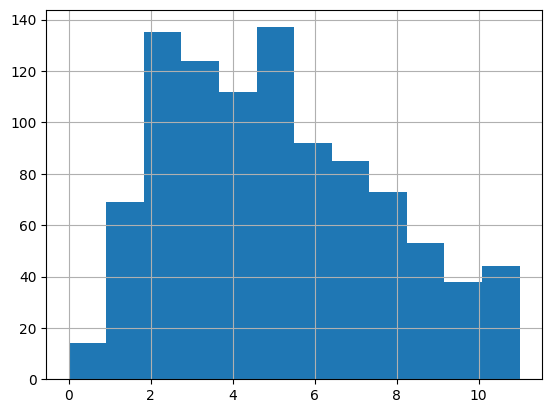

In [3]:
var = 'Make_Year'
# Converting year to age of vehicle (most recent is year 0)
df['Age'] = max(df[var])-df[var] # Convert year to age
var = 'Age'
pn(df[var].unique()) # all valid values
pn(df[var].value_counts())
pn(df[var].hist(bins=12)) # distribution looks fine

<Axes: >

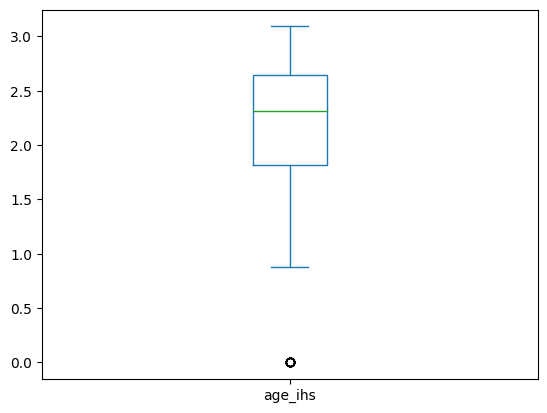

In [4]:
df['age_ihs'] = np.arcsinh(df['Age'])
df['age_ihs'].plot.box() # plot to find outliers

In [5]:
# Getting rid of outliers
df = df.loc[df['age_ihs']>0.5,:]

In [6]:
var = 'Color'
pn(df[var].unique()) # no missing category

['silver' 'red' 'white' 'bronze' 'orange' 'grey' 'blue' 'yellow' 'brown'
 'golden' 'black' 'maroon' 'purple' 'beige' 'green'] 



In [7]:
var = 'Body_Type'
pn(df[var].unique()) # no missing category

['sedan' 'crossover' 'suv' 'hatchback' 'muv'] 



[11.39888293 10.61176962 10.98664774 11.17549277 10.82480563 11.55715285
 10.93695669 12.129224   10.39231294 10.87237073 11.16761428 11.86990036
 11.07890655 10.31287828 11.06645085 10.22324952 11.85135293 11.18200181
 10.54828447 11.08189636 10.71876387 12.0550288  10.47959517 10.89340042
 10.95297962 11.29836993 10.57387775 11.59419204 11.10082841 11.97747676
  9.96655625 10.92103439 10.19533594 11.02831974 11.49164054 11.22029785
 10.81408209 10.39384513 11.64895873 12.16605241 11.01554242 11.70969219
 10.81218956 11.63115285 11.97010978  9.60696654  9.97394602 10.69176308
  8.84620915 11.76691631 10.7938449  11.84852589 11.16724698 11.74459259
 10.86628012 11.45132662 10.06339307 10.92960083 11.80071753 11.24224471
 10.20758417 10.10928147 11.98801613 12.02427495 10.68679531 11.30215505
 10.49487882 11.86299061 10.37910042 11.61939137 12.0756564  11.60357023
 10.54085772 12.18150328  9.16450585 10.80673357 11.55772673 11.50841531
 12.02635968 11.12946644 10.26910242 11.17873862 11

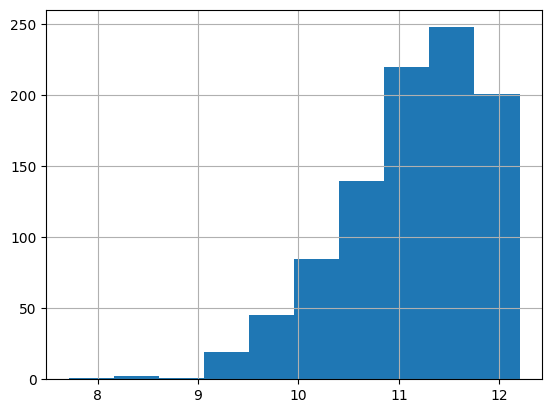

In [8]:
var = 'Mileage_Run'
df['mileage_ihs'] = np.arcsinh(df[var])
var = 'mileage_ihs'
pn(df[var].unique()) # all valid values
pn(df[var].value_counts())
pn(df[var].hist()) # distribution looks fine

<Axes: >

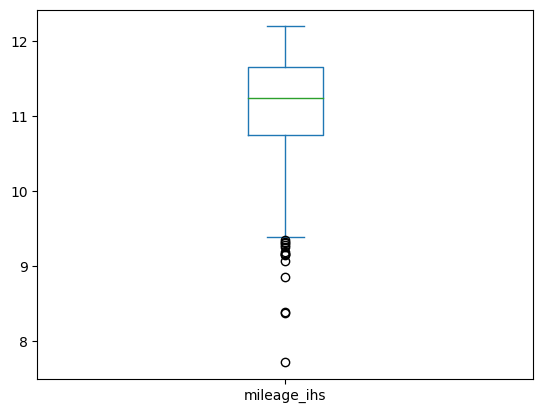

In [9]:
df[var].plot.box()

<Axes: >

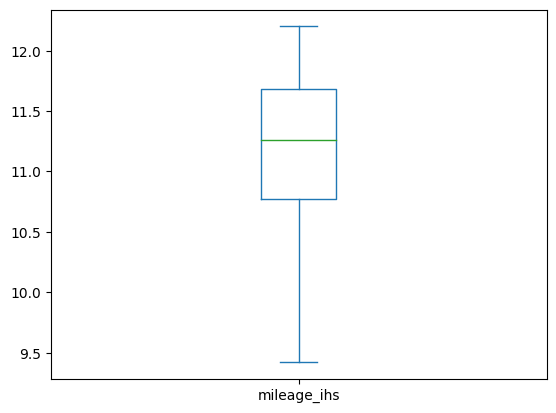

In [10]:
# dropping outliers
df = df.loc[df[var]>9.41,:]
df[var].plot.box()

In [11]:
var = 'No_of_Owners'
pn(df[var].unique()) # all valid values
pn(df[var].value_counts()) # 945, but no nans

['1st' '2nd' '3rd'] 

1st    787
2nd    154
3rd      4
Name: No_of_Owners, dtype: int64 



[5 7 8 6 4] 

5    900
7     38
8      5
6      1
4      1
Name: Seating_Capacity, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



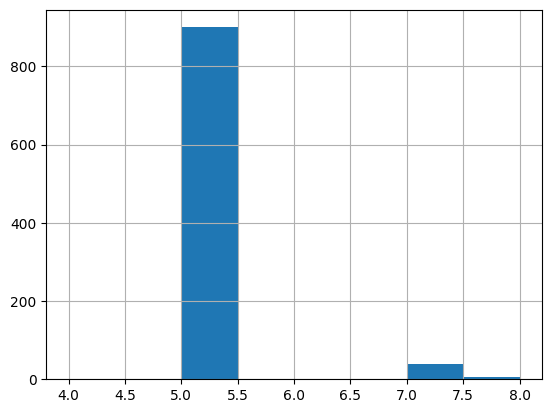

In [12]:
var = 'Seating_Capacity'
pn(df[var].unique()) # all valid values
pn(df[var].value_counts()) #945, but no nans
pn(df[var].hist(bins=8)) # fine

['diesel' 'petrol' 'petrol+cng'] 

petrol        753
diesel        191
petrol+cng      1
Name: Fuel_Type, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



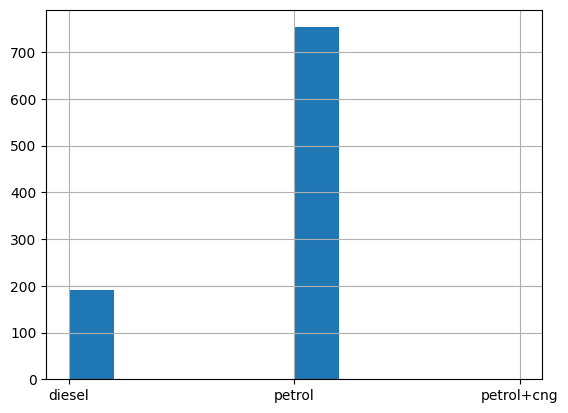

In [13]:
var = 'Fuel_Type'
pn(df[var].unique()) # all valid values
pn(df[var].value_counts())
pn(df[var].hist())

['7-Speed' '5-Speed' '6-Speed' 'CVT' '4-Speed'] 

5-Speed    721
6-Speed    167
4-Speed     39
7-Speed     16
CVT          2
Name: Transmission, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



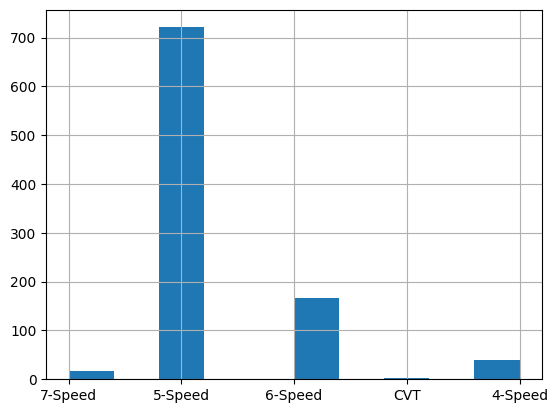

In [14]:
var = 'Transmission'
pn(df[var].unique()) # all valid values
pn(df[var].value_counts())
pn(df[var].hist())

['Automatic' 'Manual'] 

Manual       690
Automatic    255
Name: Transmission_Type, dtype: int64 

Axes(0.125,0.11;0.775x0.77) 



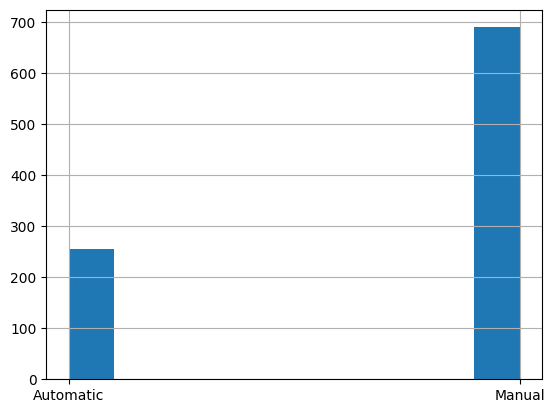

In [15]:
var = 'Transmission_Type'
pn(df[var].unique()) # all valid values
pn(df[var].value_counts())
pn(df[var].hist())

[ 657000  682000  793000  414000  515000  604000  316000 1419000  710000
  392000  613000  598000  969000 2100000  666000 1039000  860000  680000
  625000  567000  371000 1076000  587000  396000  554000  984000  507000
  586000  639000  237000  536000  456000 1107000  571000  629000  774000
  530000  367000  550000  660000  998000 1012000 1537000  908000  508000
  725000  980000  796000  435000  481000  442000  759000  455000 1972000
 1138000 1742000  568000  419000  476000  577000  541000  730000 1875000
  622000  937000  609000  638000  807000  590000  651000  694000 1364000
  783000  628000  885000  724000  470000 1085000  659000 1173000  457000
  461000  471000  902000  791000  506000  594000  362000  914000  544000
  513000  737000  664000 1027000  575000  842000  742000 1044000 1649000
  626000  320000  579000  608000  773000  615000  519000  869000 1399000
  356000  562000  522000  699000  510000  658000  369000  966000  932000
  388000  489000  926000 1709000 1770000 1163000 13

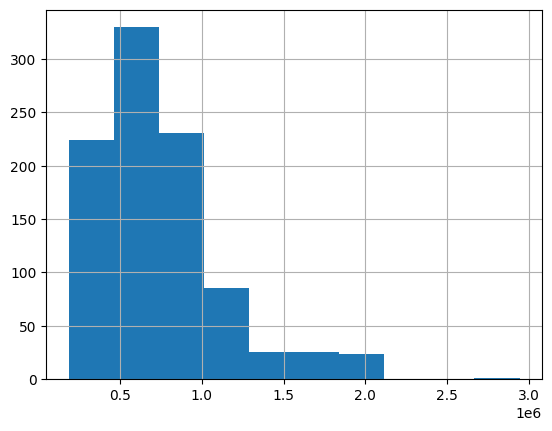

In [16]:
var = 'Price'
pn(df[var].unique()) # all valid values
pn(df[var].value_counts())
pn(df[var].hist()) # distribution has tail

<Axes: >

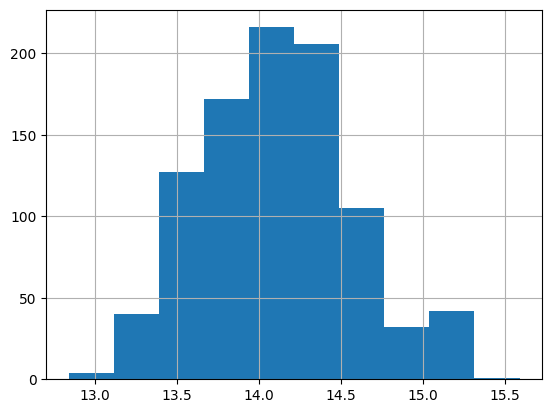

In [17]:
df['price_ihs'] = np.arcsinh(df[var])
df['price_ihs'].hist()

<Axes: >

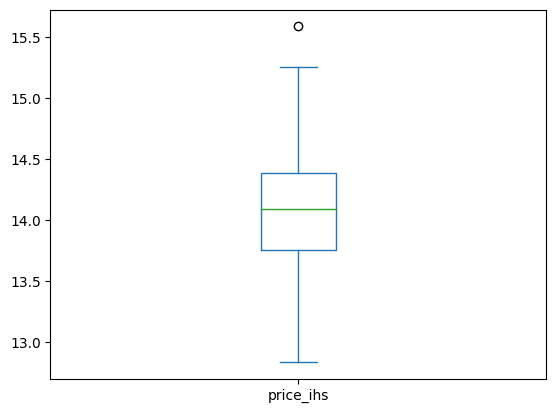

In [18]:
df['price_ihs'].plot.box()

<Axes: >

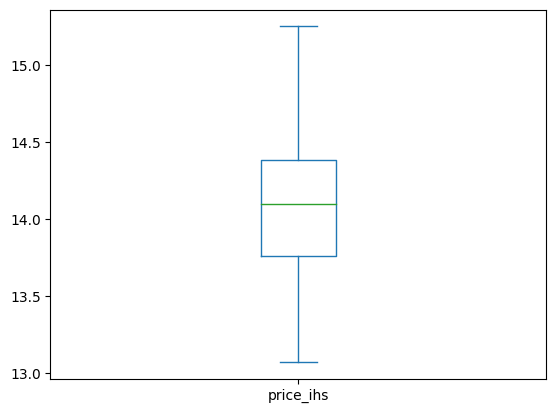

In [19]:
# Dropping price outliers
df = df.loc[df['price_ihs']>13,:]
df = df.loc[df['price_ihs']<15.5,:]

df['price_ihs'].plot.box()

In [20]:
## Cleaned data frame
df.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Age,age_ihs,mileage_ihs,price_ihs
1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000,5,2.312438,11.398883,14.088586
2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000,6,2.491780,10.611770,14.125932
3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000,3,1.818446,10.986648,14.276726
4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000,5,2.312438,11.175493,13.626768
5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000,5,2.312438,10.824806,13.845069


  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [21]:
var = 'Price'
group_by = 'Make'
df.loc[:,[group_by,var]].groupby(group_by).describe()

Price                                                     \
               count          mean            std        min        25%   
Make                                                                      
Chevrolet        6.0  4.535000e+05  246606.366503   267000.0   288500.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           73.0  7.989726e+05  266509.066586   316000.0   581000.0   
Hyundai        302.0  6.910298e+05  280321.864909   248000.0   484250.0   
Jeep             4.0  1.499500e+06  152513.387391  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  119056.709177  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  121661.135671  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  175549.305961   796000.0  1037000.0   
Maruti Suzuki  278.0  5.856655e+05  218083.181299   237000.0   407250.0   
Nissan           2.0  6.800000e+05  289913.780286   475000.0   577500.0   
Renault         63.0  6.660476e+05  216159.993655   287000.0   479500.0   
Skoda            4.0  6.847500e+05  411730.797974   436000.0   458500.0   
Tata            16.0  1.176062e+06  614190.575066   239000.0   737000.0   
Toyota          50.0  8.003400e+05  246689.973986   368000.0   526250.0   
Volkswagen      29.0  6.058276e+05  119831.151735   402000.0   542000.0   

                                                
                     50%        75%        max  
Make                                            
Chevrolet       345500.0   537500.0   892000.0  
Datsun          290000.0   295000.0   300000.0  
Ford            707500.0   787000.0  1066000.0  
Honda           785000.0   915000.0  1537000.0  
Hyundai         636500.0   836750.0  1742000.0  
Jeep           1529500.0  1581500.0  1649000.0  
Kia            1628500.0  1705750.0  1741000.0  
MG Motors      1848000.0  1978000.0  2019000.0  
Mahindra       1094500.0  1157000.0  1465000.0  
Maruti Suzuki   521500.0   764000.0  1163000.0  
Nissan          680000.0   782500.0   885000.0  
Renault         651000.0   803000.0  1164000.0  
Skoda           502000.0   728250.0  1299000.0  
Tata            911500.0  1743000.0  2100000.0  
Toyota          894000.0  1023000.0  1092000.0  
Volkswagen      607000.0   699000.0   790000.0

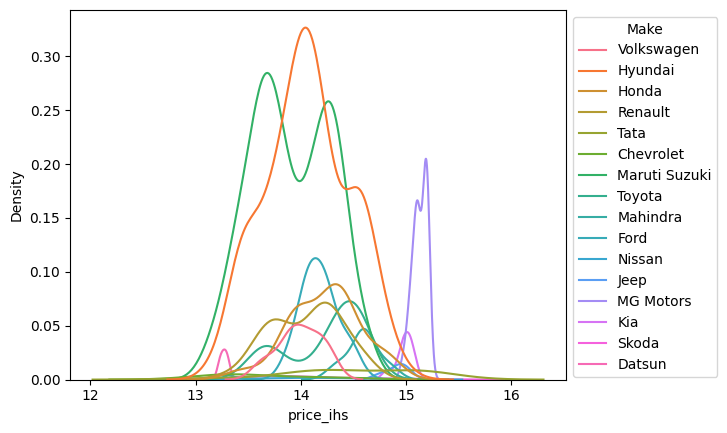

In [22]:
# for plot using the arcsinh price variable
var = 'price_ihs'
plt = sns.kdeplot(data=df, x=var, hue=group_by)
sns.move_legend(plt, "upper left", bbox_to_anchor=(1, 1)) # Moves the Legend

*Which car brands are the most expensive?*
MG Motors, Kia, and Jeep look to have their distributions centered around the highest prices. Mahindra, Skoda, and Tata appear to have fairly large variances, or at least not many observations to get values from, but they all appear to have some of the most expensive prices too.

*What do prices look like in general?*
The prices are outrageously expensive. These cars may have an additional zero(s) added to the end becuase the median car price is \$660,000 which is more than most houses cost.

  3. Split the data into an 80% training set and a 20% testing set.

In [23]:
## Split the data
X = df.loc[:,['Make','age_ihs','Color','mileage_ihs','Body_Type','No_of_Owners','Seating_Capacity','Fuel_Type','Transmission','Transmission_Type']]
y = df.loc[:,'price_ihs']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [24]:
## Model 1: Regress price on numerical values
# Numerical variables: Age, Mileage_Run, Seating_Capacity

from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

vars = ['age_ihs', 'mileage_ihs', 'Seating_Capacity'] # This is a list of variables to use

X_train_num = X_train.loc[:,vars] # Construct data matrix
X_test_num = X_test.loc[:,vars]

# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train_num) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_num_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test_num) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_num_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_num_lm, y_train) # Fit the linear model
print('Intercept: ', reg.intercept_) # Intercept value
print('Regression coefficients: ', reg.coef_) # Regression coefficients
R2_lm = reg.score(X_test_num_lm, y_test)
print('Coefficient of determination: ', R2_lm) # R squared measure

# Get RMSE
y_hat_lm = reg.predict(X_test_num_lm)
N_test = len(y_test)
SSE_lm = np.sum( (y_test-y_hat_lm)**2 )
RMSE_lm = (SSE_lm/N_test)**(1/2)
print('RMSE: ', RMSE_lm)

Intercept:  230.2103542258548
Regression coefficients:  [ 3.33078041e+01 -5.33221295e+01 -2.70412245e+01 -2.09867836e-01
 -2.25818501e+00 -7.52359023e+00  3.30398644e+00  7.13214619e+00
 -4.18389310e-01 -8.88381022e-02  1.03048526e-01 -1.16130019e-01
 -5.32806763e-02  5.60770609e-01  1.59251991e-01 -4.50514341e-02
 -3.19153603e-01 -1.00062244e-01  4.50427412e-02]
Coefficient of determination:  0.4139126422164223
RMSE:  0.373711408157897


In [25]:
## Model 2: Regress price on categorical variables
# Categorical variables: Make, Color, Body_Type, No_of_Owners, Fuel_Type, Transmission, Transmission_Type

vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']

## Split the data
X = df.loc[:,vars]
y = df.loc[:,'price_ihs']

# One hot encoding
from sklearn.preprocessing import LabelBinarizer
one_hot_encoder = LabelBinarizer()

var = 'Make'
oh = one_hot_encoder.fit_transform(X[var]) # One-hot encode the categorical variables
names = one_hot_encoder.classes_ # Get names of the classes
Make_df = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables

var = 'Color'
oh = one_hot_encoder.fit_transform(X[var]) # One-hot encode the categorical variables
names = one_hot_encoder.classes_ # Get names of the classes
Color_df = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables

var = 'Body_Type'
oh = one_hot_encoder.fit_transform(X[var]) # One-hot encode the categorical variables
names = one_hot_encoder.classes_ # Get names of the classes
Body_Type_df = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables

var = 'No_of_Owners'
oh = one_hot_encoder.fit_transform(X[var]) # One-hot encode the categorical variables
names = one_hot_encoder.classes_ # Get names of the classes
No_of_Owners_df = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables

var = 'Fuel_Type'
oh = one_hot_encoder.fit_transform(X[var]) # One-hot encode the categorical variables
names = one_hot_encoder.classes_ # Get names of the classes
Fuel_Type_df = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables

var = 'Transmission'
oh = one_hot_encoder.fit_transform(X[var]) # One-hot encode the categorical variable
names = one_hot_encoder.classes_ # Get names of the classes
Transmission_df = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables

var = 'Transmission_Type'
oh = one_hot_encoder.fit_transform(X[var]) # One-hot encode the categorical variables
names = one_hot_encoder.classes_ # Get names of the classes
oh2 = 1-oh
def merger (A,B): # source: PyNEwbie response to https://stackoverflow.com/questions/22597966/is-there-a-way-to-merge-multiple-list-index-by-index
    answer = []
    for y in range (len(A)):
        a=int(A[y])
        b=int(B[y])
        temp=[a,b]
        answer.append(temp)
    return answer
ohfinial = merger(oh,oh2)
Transmission_Type_df = pd.DataFrame( data = ohfinial, 
                                    columns = names) # Create a new df for the encoded variables
# Concatenate the dataframes
X_bi = pd.concat([Make_df, Color_df, Body_Type_df, No_of_Owners_df, Fuel_Type_df, Transmission_df, Transmission_Type_df], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bi,y,test_size=.2,random_state=100)

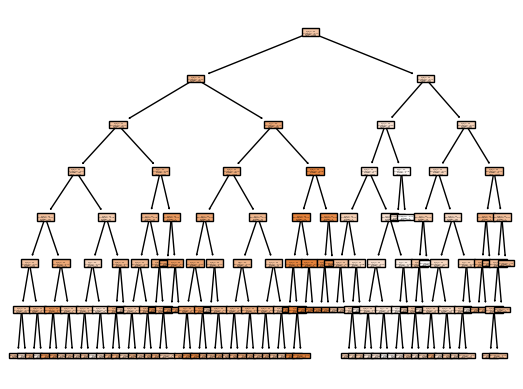

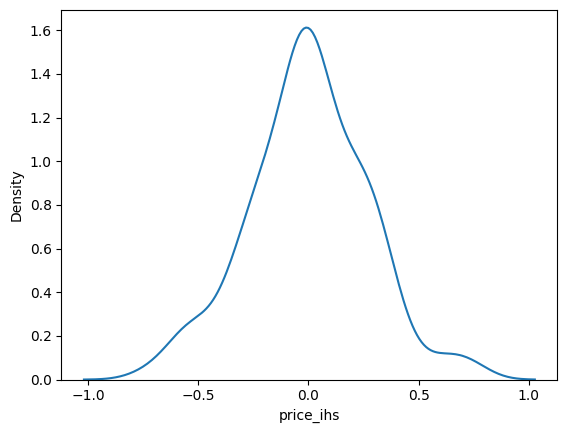

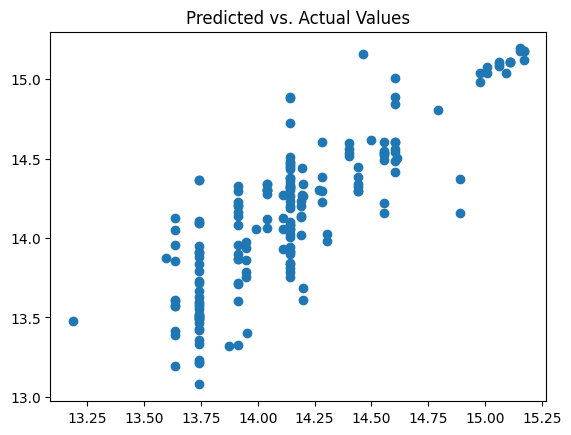

Coefficient of determination:  0.7037971378953003
RMSE:  0.26841747537214955


In [26]:
## Decision Tree:
from sklearn import tree 
import matplotlib.pyplot as plt

model = tree.DecisionTreeRegressor(max_depth=7) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Residual plot:
sns.kdeplot(residuals_cart)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart = 1 - SSE_cart/TSS
print('Coefficient of determination: ', R2_cart) # R squared measure
print('RMSE: ', RMSE_cart)

Model 2 works better than model 1 which is shown by model one having a larger coefficient of determination and a lower root mean squared error.

In [27]:
## Model 3: Regress price on all variables

# dataframes to combine
# --> the X_bi made for part 2
# and
X_num = df.loc[:,['age_ihs', 'mileage_ihs', 'Seating_Capacity']]
X_num = X_num.reset_index(drop=True)
y_preliminary = df['price_ihs'].reset_index(drop=True)

# Concatenate the dataframes
X_3_preliminary = pd.concat([X_bi, X_num, y_preliminary], axis=1)
X_3_preliminary = X_3_preliminary.dropna()
X_3_preliminary = X_3_preliminary.reset_index(drop=True)
y = X_3_preliminary['price_ihs']
X_3 = X_3_preliminary.drop(columns = ['price_ihs'])

# Split data into test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size=.2,random_state=100)

# kNN
from sklearn.neighbors import KNeighborsRegressor

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = X_train.apply(maxmin)
X_test_knn = X_test.apply(maxmin)
X_test_knn['CVT'] = X_test_knn['CVT'].fillna(0)

X_test.isnull()

,Chevrolet,Datsun,Ford,Honda,Hyundai,Jeep,Kia,MG Motors,Mahindra,Maruti Suzuki,...,4-Speed,5-Speed,6-Speed,7-Speed,CVT,Automatic,Manual,age_ihs,mileage_ihs,Seating_Capacity
143,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
229,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# Determine optimal k:
k_bar = 70
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

## SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

ValueError: Input X contains NaN.
KNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [29]:
## Fit optimal model:
model = KNeighborsRegressor(n_neighbors=max(3,k_star))
knn_star = model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
N_test = len(y_test)
residuals_knn = y_test - y_hat_knn

## Residual plot:
sns.kdeplot(residuals_knn)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_knn,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## Metrics:
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
MSE_knn = SSE_knn/N_test
RMSE_knn = (SSE_knn/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_knn = 1 - SSE_knn/TSS

NameError: name 'k_star' is not defined

I tried doing this part for numerous hours and could not figure out how to clean the data to get rid of observations without values. I checked every variable for nans and none of them appeared to have any. I had to give up on the knn model due to time constraints, so apologies for the incomplete work. I have instead made a regression tree using all of the variables, which is shown below.

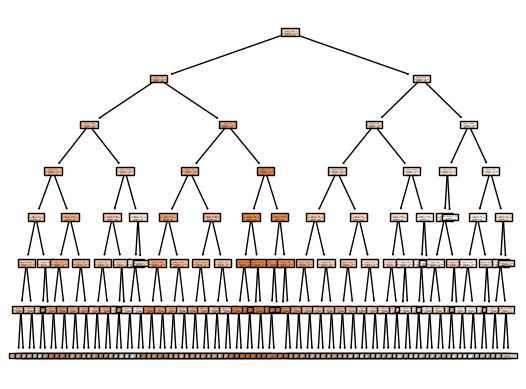

Coefficient of determination:  0.7928091362894885
RMSE:  0.22449230666061687


In [30]:
## Model 3: Regress price on all variables

# dataframes to combine
# --> the X_bi made for part 2
# and
X_num = df.loc[:,['age_ihs', 'mileage_ihs', 'Seating_Capacity']]
X_num = X_num.reset_index(drop=True)
y_preliminary = df['price_ihs'].reset_index(drop=True)

# Concatenate the dataframes
X_3_preliminary = pd.concat([X_bi, X_num, y_preliminary], axis=1)
X_3_preliminary = X_3_preliminary.dropna()
X_3_preliminary = X_3_preliminary.reset_index(drop=True)
y = X_3_preliminary['price_ihs']
X_3 = X_3_preliminary.drop(columns = ['price_ihs'])

# Split data into test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size=.2,random_state=100)

from sklearn import tree 
model = tree.DecisionTreeRegressor(max_depth=7) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

In [31]:
## Comparison Table:

gdf = pd.DataFrame({'RMSE':[RMSE_lm,RMSE_cart,RMSE_cart2],
                    'R2':[R2_lm,R2_cart,R2_cart2]})
gdf.index = ['LM','CART','FULL CART']
gdf.head()

,RMSE,R2
LM,0.373711,0.413913
CART,0.268417,0.703797
FULL CART,0.224492,0.792809


The model using all of the variables in the regression (model 3) performs the best with the highest R2 value and the lowest error.

  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?

In [32]:
## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Expand features
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm) # Compute predicted values from the model
N_test = len(y_test)
y_hat_lm = np.round(y_hat_lm) # Round values to 0 or 1
tab = pd.crosstab(y_hat_lm,y_test) # Compute confusion matrix

## Metrics:
SSE_lm_pf = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm_pf = (1/N_test)*np.sum( (y_test-y_hat_lm)**2 )
RMSE_lm_pf = (SSE_lm_pf/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_lm_pf = 1 - SSE_lm_pf/TSS
print('Coefficient of determination: ', R2_lm_pf) # R squared measure
print('RMSE: ', RMSE_lm_pf)

Coefficient of determination:  0.4801514583650144
RMSE:  0.3555941248390095


In [33]:
## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Expand features
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm) # Compute predicted values from the model
N_test = len(y_test)
y_hat_lm = np.round(y_hat_lm) # Round values to 0 or 1
tab = pd.crosstab(y_hat_lm,y_test) # Compute confusion matrix

## Metrics:
SSE_lm_pf2 = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm_pf2 = (1/N_test)*np.sum( (y_test-y_hat_lm)**2 )
RMSE_lm_pf2 = (SSE_lm_pf2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_lm_pf2 = 1 - SSE_lm_pf2/TSS
print('Coefficient of determination: ', R2_lm_pf2) # R squared measure
print('RMSE: ', RMSE_lm_pf2)

Coefficient of determination:  -2.1656801604108076e+18
RMSE:  725793911.9013371


In [34]:
## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Expand features
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm) # Compute predicted values from the model
N_test = len(y_test)
y_hat_lm = np.round(y_hat_lm) # Round values to 0 or 1
tab = pd.crosstab(y_hat_lm,y_test) # Compute confusion matrix

## Metrics:
SSE_lm_pf3 = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm_pf3 = (1/N_test)*np.sum( (y_test-y_hat_lm)**2 )
RMSE_lm_pf3 = (SSE_lm_pf3/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_lm_pf3 = 1 - SSE_lm_pf3/TSS
print('Coefficient of determination: ', R2_lm_pf3) # R squared measure
print('RMSE: ', RMSE_lm_pf3)

Coefficient of determination:  -5.201403529511461e+18
RMSE:  1124802922.1514323


Increasing the polynomial degree decreased the R2 and increased the error. When the polynomial was increased to 2, the R2 number became negative. The "best" expanded model would have to be the 2nd degree one, which performs horribly. The expanded model for this scenario perform much worse than the previous models.

  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

Coefficient of determination:  0.4801514583650144
RMSE:  0.3555941248390095


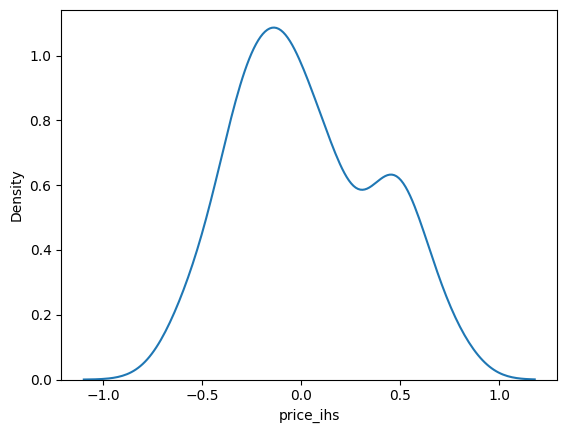

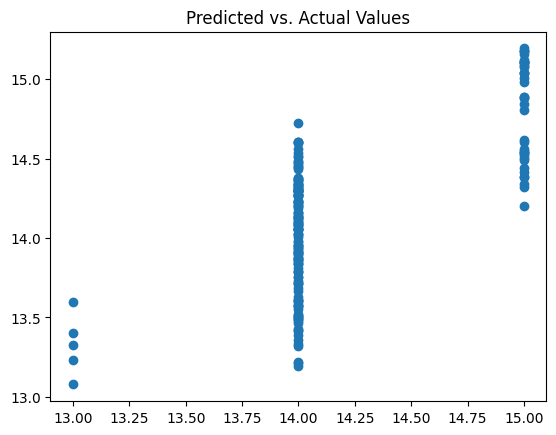

In [35]:
# dataframes to combine
# --> the X_bi made for part 2
# and
X_num = df.loc[:,['age_ihs', 'mileage_ihs', 'Seating_Capacity']]
X_num = X_num.reset_index(drop=True)
y_preliminary = df['price_ihs'].reset_index(drop=True)

# Concatenate the dataframes
X_3_preliminary = pd.concat([X_bi, X_num, y_preliminary], axis=1)
X_3_preliminary = X_3_preliminary.dropna()
X_3_preliminary = X_3_preliminary.reset_index(drop=True)
y = X_3_preliminary['price_ihs']
X_3 = X_3_preliminary.drop(columns = ['price_ihs'])

# Split data into test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size=.2,random_state=100)## Linear Model sample code:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

# Expand features
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model

# Predicted values:
y_hat_lm = reg.predict(X_test_lm) # Compute predicted values from the model
N_test = len(y_test)
y_hat_lm = np.round(y_hat_lm) # Round values to 0 or 1
tab = pd.crosstab(y_hat_lm,y_test) # Compute confusion matrix

## Metrics:
SSE_lm_pf = np.sum( (y_test-y_hat_lm)**2 )
MSE_lm_pf = (1/N_test)*np.sum( (y_test-y_hat_lm)**2 )
RMSE_lm_pf = (SSE_lm_pf/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_lm_pf = 1 - SSE_lm_pf/TSS
print('Coefficient of determination: ', R2_lm_pf) # R squared measure
print('RMSE: ', RMSE_lm_pf)

## Residual kernal density plot:
residuals_lm = y_hat_lm - y_test
sns.kdeplot(residuals_lm)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

The values are relatively centered around 0 on the kernal density plot. However, there appears to be a large error in the model which is shown by there being two peaks. Additionally, the residual scatter plot shows that the values appear to be like categories and not of a smooth regression. The error is also relatively large at RMSE of 0.36.

  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?

In [36]:
# dataframes to combine
# --> the X_bi made for part 2
# and
X_num = df.loc[:,['age_ihs', 'mileage_ihs', 'Seating_Capacity']]
X_num = X_num.reset_index(drop=True)
y_preliminary = df['price_ihs'].reset_index(drop=True)

# Concatenate the dataframes
X_3_preliminary = pd.concat([X_bi, X_num, y_preliminary], axis=1)
X_3_preliminary = X_3_preliminary.dropna()
X_3_preliminary = X_3_preliminary.reset_index(drop=True)
y = X_3_preliminary['price_ihs']
X_3 = X_3_preliminary.drop(columns = ['price_ihs'])

# Split data into test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_3,y,test_size=.2,random_state=100)

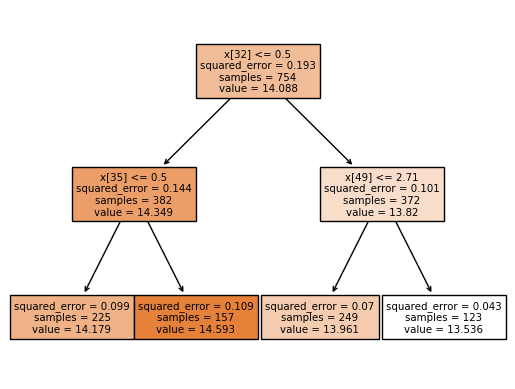

Coefficient of determination:  0.5689460300309989
RMSE:  0.32380383388215794


In [37]:
from sklearn import tree 
model = tree.DecisionTreeRegressor(max_depth=2) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

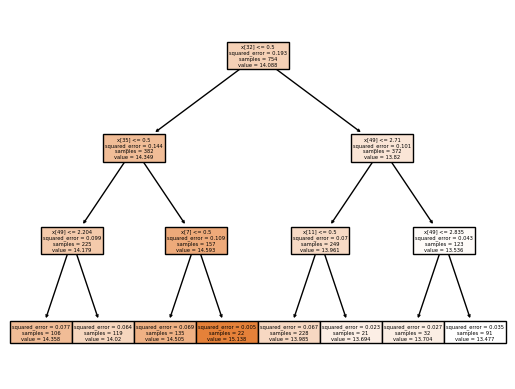

Coefficient of determination:  0.6912151232942763
RMSE:  0.2740590657050677


In [38]:
model = tree.DecisionTreeRegressor(max_depth=3) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

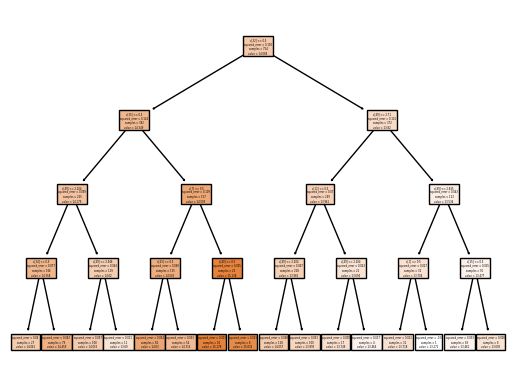

Coefficient of determination:  0.7653845795726657
RMSE:  0.23888805725883816


In [39]:
model = tree.DecisionTreeRegressor(max_depth=4) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

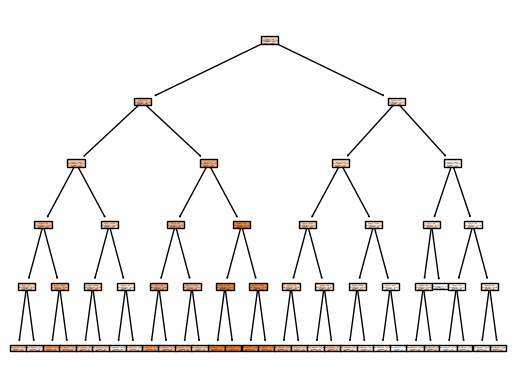

Coefficient of determination:  0.7906064297811952
RMSE:  0.22568247336873162


In [40]:
model = tree.DecisionTreeRegressor(max_depth=5) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

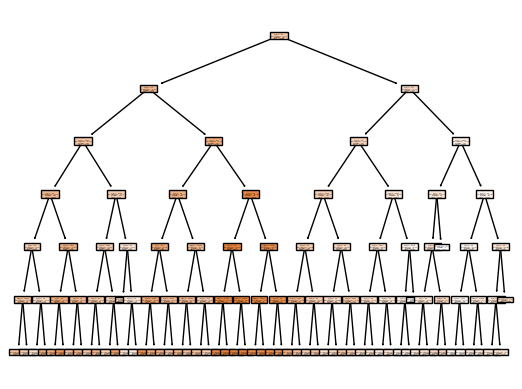

Coefficient of determination:  0.786792600653133
RMSE:  0.22772845425591484


In [41]:
model = tree.DecisionTreeRegressor(max_depth=6) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

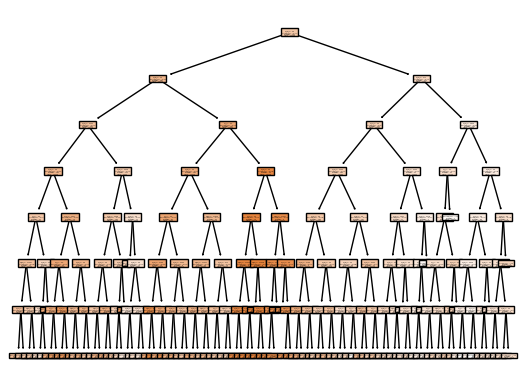

Coefficient of determination:  0.7924838868142972
RMSE:  0.22466844225570629


In [42]:
model = tree.DecisionTreeRegressor(max_depth=7) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

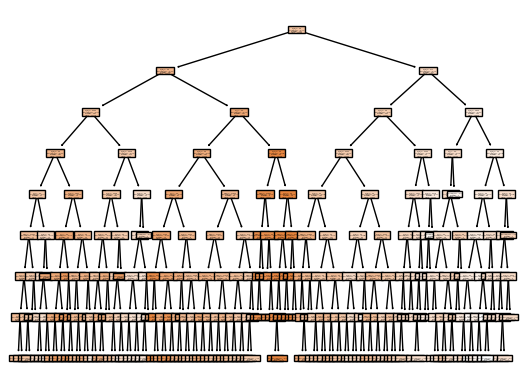

Coefficient of determination:  0.8027304868183842
RMSE:  0.2190514580837469


In [43]:
model = tree.DecisionTreeRegressor(max_depth=8) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

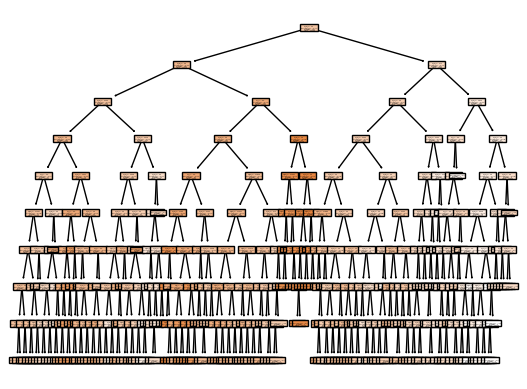

Coefficient of determination:  0.828484223244381
RMSE:  0.20425288484048318


In [44]:
model = tree.DecisionTreeRegressor(max_depth=9) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

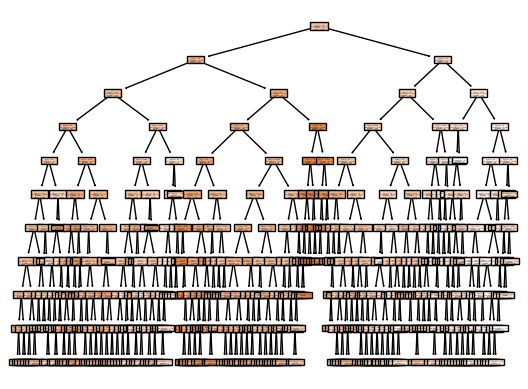

Coefficient of determination:  0.8291677349635216
RMSE:  0.2038454919726428


In [45]:
model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

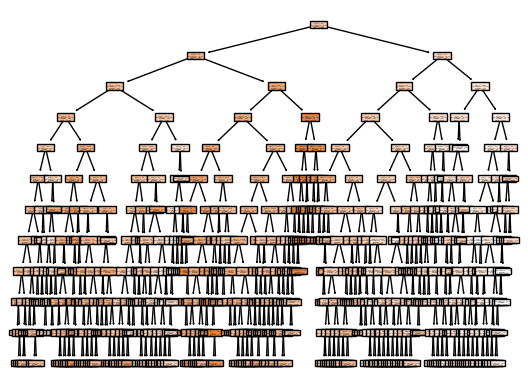

Coefficient of determination:  0.8178788807451934
RMSE:  0.21047296408449015


In [47]:
model = tree.DecisionTreeRegressor(max_depth=11) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

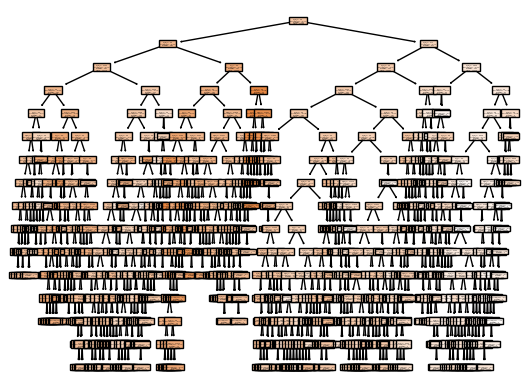

Coefficient of determination:  0.7729746751064018
RMSE:  0.23499212841579428


In [46]:
model = tree.DecisionTreeRegressor(max_depth=15) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

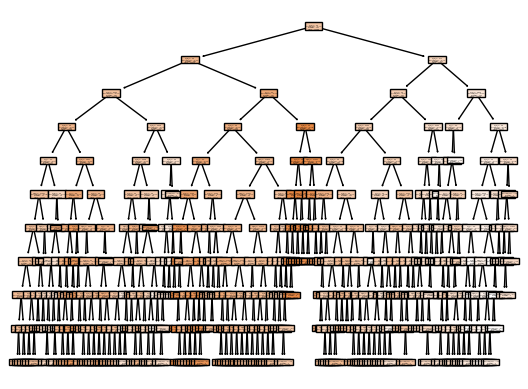

Coefficient of determination:  0.8209365836154084
RMSE:  0.2086986285015119


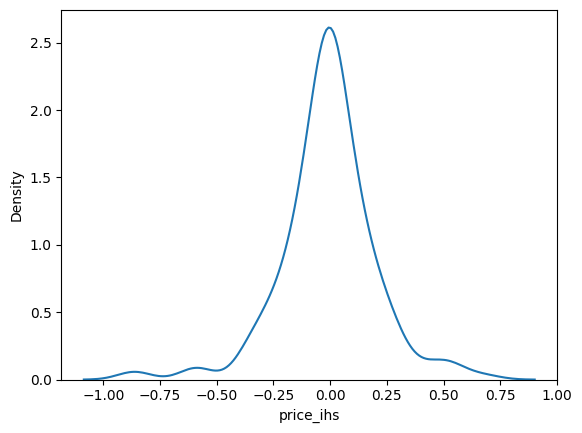

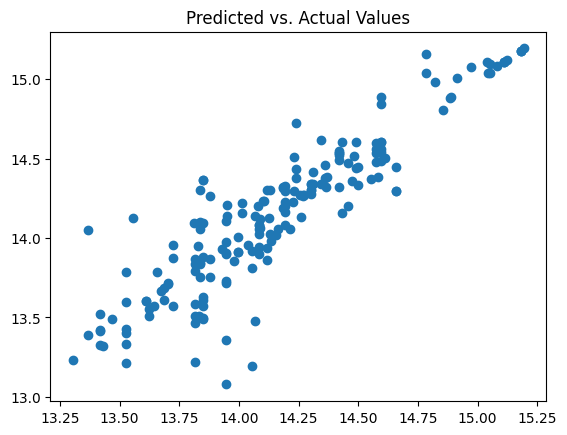

In [48]:
model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True) 
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
N_test = len(y_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart2 = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart2 = (SSE_cart2/N_test)**(1/2)
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart2 = 1 - SSE_cart2/TSS
print('Coefficient of determination: ', R2_cart2) # R squared measure
print('RMSE: ', RMSE_cart2)

## Residual kernal density plot:
sns.kdeplot(residuals_cart)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

In the scatterplot, the predicted and actual values do follow a diagonial. Additionally, the kernal density plot shows that there is a bell shaped curve centered around zero.

  9. Which model --- linear model or classification and regression tree --- has better performance on the test set?

The regression tree model performs the best out of all of the models. It has the highest R2 value at 0.82 when the tree depth is 10, and it has the lowest error with a RMSE of 0.208.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?

In [3]:
cmc = pd.read_csv('./data/contraception_hw.csv')
cmc.head()

,Unnamed: 0,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,1,24,2,3,3,1,1,2,3,0,1
1,2,45,1,3,10,1,1,3,4,0,1
2,3,43,2,3,7,1,1,3,4,0,1
3,4,42,3,2,9,1,1,3,3,0,1
4,5,36,3,3,8,1,1,3,2,0,1


In [4]:
pn(cmc['method'].value_counts())
# 1 = No contraception
# 3 = Short term
# 2 = Long term

1    629
3    511
2    333
Name: method, dtype: int64 



In [5]:
pd.crosstab(cmc['method'],cmc['numberChildren'])

numberChildren,0,1,2,3,4,5,6,7,8,9,10,11,12,13,16
method,,,,,,,,,,,,,,,
1,95,143,114,70,57,44,35,18,29,5,9,6,4,0,0
2,0,46,56,70,62,36,27,19,9,3,2,2,0,1,0
3,2,87,106,119,78,55,30,12,9,8,0,3,0,1,1


In [6]:
print('Mean: ', cmc.groupby('method').mean()['numberChildren'])
print('Median: ', cmc.groupby('method').median()['numberChildren'])

Mean:  method
1    2.934817
2    3.738739
3    3.352250
Name: numberChildren, dtype: float64
Median:  method
1    2.0
2    3.0
3    3.0
Name: numberChildren, dtype: float64


Couples who use birth control tend to have more children than those who do not when looking at the mean and median of the data.

  2. Split the sample into ~80% training data and ~20% testing data.

In [7]:
X = cmc.drop(['method'], axis = 1)
y = cmc['method']

## Splitting the Sample into Train/Test Sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.

[Text(0.3333333333333333, 0.9, 'x[0] <= 415.5\nsquared_error = 0.763\nsamples = 1178\nvalue = 1.928'),
 Text(0.2222222222222222, 0.7, 'squared_error = 0.0\nsamples = 322\nvalue = 1.0'),
 Text(0.4444444444444444, 0.7, 'x[0] <= 1001.5\nsquared_error = 0.604\nsamples = 856\nvalue = 2.277'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 642.5\nsquared_error = 0.237\nsamples = 473\nvalue = 2.613'),
 Text(0.1111111111111111, 0.3, 'squared_error = 0.0\nsamples = 183\nvalue = 2.0'),
 Text(0.3333333333333333, 0.3, 'squared_error = 0.0\nsamples = 290\nvalue = 3.0'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 1214.5\nsquared_error = 0.746\nsamples = 383\nvalue = 1.862'),
 Text(0.5555555555555556, 0.3, 'squared_error = 0.0\nsamples = 173\nvalue = 1.0'),
 Text(0.7777777777777778, 0.3, 'x[0] <= 1320.5\nsquared_error = 0.245\nsamples = 210\nvalue = 2.571'),
 Text(0.6666666666666666, 0.1, 'squared_error = 0.0\nsamples = 90\nvalue = 2.0'),
 Text(0.8888888888888888, 0.1, 'squared_error = 0.0\nsamples = 120\nvalu

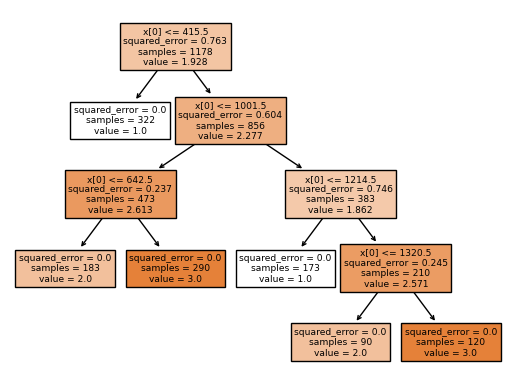

In [12]:
from sklearn import tree # Import the tree regressor

# Fit decision tree:
cart = tree.DecisionTreeRegressor() # Create a regression
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True) 

The terminal node is the very first column which is just a hard coded index column. This does not make sense because it means no actual substantive data is being used to make the decision cut offs.

  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?

[Text(0.4230769230769231, 0.875, 'x[3] <= 0.5\ngini = 0.649\nsamples = 1178\nvalue = [495, 273, 410]'),
 Text(0.15384615384615385, 0.625, 'x[0] <= 18.0\ngini = 0.048\nsamples = 81\nvalue = [79, 0, 2]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.375, 'x[6] <= 3.5\ngini = 0.025\nsamples = 80\nvalue = [79, 0, 1]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 78\nvalue = [78, 0, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.6923076923076923, 0.625, 'x[0] <= 37.5\ngini = 0.656\nsamples = 1097\nvalue = [416, 273, 408]'),
 Text(0.5384615384615384, 0.375, 'x[1] <= 3.5\ngini = 0.643\nsamples = 778\nvalue = [247, 181, 350]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.612\nsamples = 476\nvalue = [173, 74, 229]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.654\nsamples = 302\nvalue = [74, 107, 121]'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 3.5\ngini = 0.603\nsamples

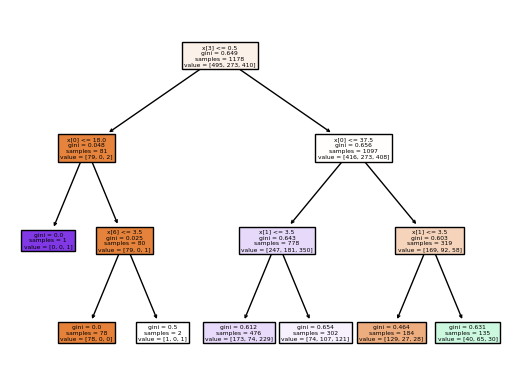

In [14]:
# Preprocess data
X = cmc.drop(['Unnamed: 0','method'], axis = 1)
y = cmc['method']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

# Fit decision tree:
cart = tree.DecisionTreeClassifier(max_depth=3) # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

# Visualize results:
tree.plot_tree(cart,filled=True) 

In [30]:
print('First split occurs using the "',X_train.columns[3], '" variable.')
print('Second split occurs using the "', X_train.columns[0], '" variable.')
print('Third splits occur using the "', X_train.columns[6], '" and "', X_train.columns[1], '" variables.')

First split occurs using the " numberChildren " variable.
Second split occurs using the " age " variable.
Third splits occur using the " spouse_occupation " and " edu " variables.


  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.

In [33]:
# Prediction using test set
y_hat = cart.predict(X_test)

# Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[2,2])/(tab.iloc[0,0]+tab.iloc[0,1]+tab.iloc[0,2]+tab.iloc[1,0]+tab.iloc[1,1]+tab.iloc[1,2]+tab.iloc[2,0]+tab.iloc[2,1]+tab.iloc[2,2]) # Compute Accuracy
print('Overall Model Accuracy: ', acc, '\n')
m1acc =(tab.iloc[0,0])/(tab.iloc[0,0]+tab.iloc[0,1]+tab.iloc[0,2])
print('Method 1 Accuracy: ', m1acc, '\n')
m2acc = (tab.iloc[1,1])/(tab.iloc[1,0]+tab.iloc[1,1]+tab.iloc[1,2])
print('Method 2 Accuracy: ', m2acc, '\n')
m3acc = (tab.iloc[2,2])/(tab.iloc[2,0]+tab.iloc[2,1]+tab.iloc[2,2])
print('Method 3 Accuracy: ', m3acc, '\n')
pd.crosstab(y_test,y_hat)

Overall Model Accuracy:  0.5220338983050847 

Method 1 Accuracy:  0.40298507462686567 

Method 2 Accuracy:  0.26666666666666666 

Method 3 Accuracy:  0.8316831683168316 



col_0,1,2,3
method,,,
1,54,9,71
2,8,16,36
3,5,12,84


  6. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

You cannot use a linear probability model in this exercise because the method variable is categorical, not continuous, therefore since we are not using dummy variables, the regression cannot be used. Also, as visible above, even the classifier tree is not very accurate, and is worse than randomly guessing for methods 1 and 2, so weights for the variables would be misleading because they may be effective for predicting 1 method, but not the other 2. 

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?